<a href="https://colab.research.google.com/github/skrzypczykt/MAchineLearningProjects/blob/main/MLP_with_np.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi Layer Perceptron

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import tqdm
import pandas as pd

In [13]:
class TwoLayerMLP():
  """ Class implementing 2 layer multi Perceptron Neural Network model"""

  #sigmoid activation function
  sigmoid = lambda _sum: 1 / (1 + np.exp(-_sum))

  #first derivative of sigmoid activation function
  sigmoid_derivative = lambda _sum: TwoLayerMLP.sigmoid(_sum) * (1 - TwoLayerMLP.sigmoid(_sum))

  def __init__(self, hidden_layer_size=2):
    """ Creating a NN with 2 input neurons, hidden_layer_size hidden neurons and 1 output neuron with sigmoid activations."""

    #initializing the weights with normal distribution and biases with zeros
    self.layers = [[np.random.normal(size=(2,hidden_layer_size)), np.zeros(shape=(1,hidden_layer_size))],
                   [np.random.normal(size=(hidden_layer_size,1)), np.zeros(shape=(1,1))]
    ]

    #internal sums for neurons saved for backpropagation purposes
    self.sums = []
    #activation values for neurons saved for backpropagation purposes
    self.activations = []

  def predict(self, input_:np.ndarray, is_training=False) -> np.ndarray:
    """ This function performs the Forward step of the network both at train and test time. You can use with with one or more input samples."""
    x = input_.copy()

    #first layer forward step
    sum_ = x @ self.layers[0][0] + self.layers[0][1]
    #activation_function
    z = TwoLayerMLP.sigmoid(sum_)

    if is_training:
      #only during training we must remember past sums and activations
      self.sums = [sum_]
      self.activations = [z]

    #second layer forward step
    sum_ = z @ self.layers[1][0] + self.layers[1][1]
    output = TwoLayerMLP.sigmoid(sum_)

    if is_training:
      self.sums.append(sum_)
      self.activations.append(output)

    return sum_

  def fit(self, X:np.ndarray, y:np.ndarray, epochs:int, lr:float) -> dict:
    """This function performs the backpropagation process of training the MLP model.

    returns history: a dictonary of performance metrics ex. loss function"""

    #training history
    history = {'loss':[]}

    for _ in tqdm.tqdm(range(epochs), position=0, leave=True):
        # Forward Step  --------------------------------------------------------
        predictions = self.predict(X, is_training=True)
        #calculate the prediction error for all samples at once
        error = mse(predictions, y)
        history['loss'].append(error)

        #MSE derivative
        gradient = 2 * (predictions - y)

        # Backpropagation -----------------------------------------------------
        #Output Layer
        #backprop for activation function
        gradient = gradient * TwoLayerMLP.sigmoid_derivative(self.sums[-1])
   
        #update_bias
        self.layers[1][1] = self.layers[1][1] - lr*np.sum(gradient)

        #update weights
        weight_update = gradient.reshape(X.shape[0],1,1)
        
        weight_update = np.array([a @ g for a, g in zip(self.activations[0].reshape(X.shape[0],2,1), weight_update)]).reshape(X.shape[0], 2, 1)
        # sum for all samples
        gradient = np.array([self.layers[1][0] * grad for grad in gradient ]).sum(axis = -1)
        #update weights
        # sum for all neurons
        self.layers[1][0] = self.layers[1][0] - lr*weight_update.sum(axis = 0)
         
        
        #Hidden Layer-----------------------------------------------------------
        #backprop for activation function
        gradient = gradient * (TwoLayerMLP.sigmoid_derivative(self.sums[-2])[np.newaxis])

        #update_bias
        self.layers[0][1] = self.layers[0][1] - lr*np.sum(gradient)

        #update weights
        weight_update = gradient.reshape(X.shape[0],1,2)
        
        weight_update = np.array([a @ g for a, g in zip(X.reshape(X.shape[0],2,1), weight_update)]).reshape(X.shape[0], 2, 2)

        self.layers[0][0] = self.layers[0][0] - lr*weight_update.sum(axis = 0)


    return history
    

def mse(predictions, true):
  """ Mean Squared Error of predictions. Multi sample mode"""
  return np.sum(np.square(predictions - true))

#Test the solution for XOR problem

In [14]:
# XOR
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])

y = np.array([[0],[1],[1],[0]])

Make predicitons before training to check the data format and that the model works

In [20]:
#create a model
model = TwoLayerMLP()
#make predictions before training
predictions = model.predict(X)
#calculate the mean squared error
mse(predictions, y)

3.324558073590044

In [21]:
#Perform the training
history = model.fit(X,y,epochs=25000, lr=2e-2)
#Make predictions after training
predictions = model.predict(X)
#calculate the mean squared error
mse(predictions, y)

100%|██████████| 25000/25000 [00:04<00:00, 6058.55it/s]


0.05324502801848801

Plot the MSE per epoch

Text(0, 0.5, 'loss MSE')

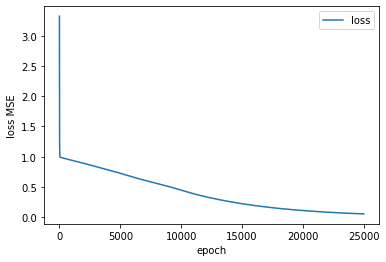

In [22]:
#This plot shows how the training proceeds and how the mse loss is decreasing
pd.DataFrame(history).plot()
plt.xlabel("epoch")
plt.ylabel("loss MSE")

This plot helped us to pick the right learning rate. for lr=0.02 We got very sharp decrease in first epochs. Maybe for this plot we could continue training but we are already very close to 0.

###**Weights analysis**

We create a dataset of 1000 random uniformly distributed samples, i.e.  $(x,y) \in [-0.5; 1.5] ^2$. We will analyse the predictions.

In [ ]:
data_size = 1000
data = np.random.uniform(size=(data_size,2))*2  - 0.5

####For first hidden neuron

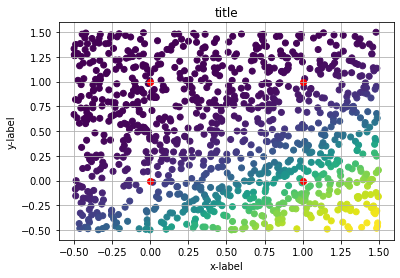

In [ ]:
first_neuron =  TwoLayerMLP.sigmoid(data @ model.layers[0][0][0] + model.layers[0][1][0][0])

plt.scatter(data[:,0], data[:,1], c=first_neuron)
plt.scatter(X[:,0], X[:,1], c = 'r')
plt.title("title")
plt.xlabel("x-label")
plt.ylabel("y-label")
plt.grid()
plt.show()

We can see that the area around (1,0) is being discriminated by the first neuron. So it speciatializes in detecting the (True, False) case.

####For first hidden neuron

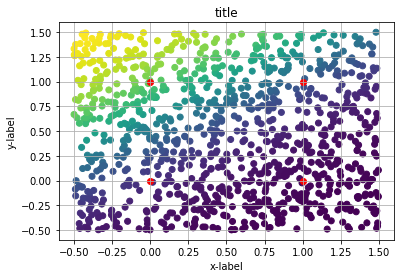

In [ ]:
second_neuron = TwoLayerMLP.sigmoid(data @ model.layers[0][0][1] + model.layers[0][1][0][1])


plt.scatter(data[:,0], data[:,1], c=second_neuron)
plt.scatter(X[:,0], X[:,1], c = 'r')
plt.title("title")
plt.xlabel("x-label")
plt.ylabel("y-label")
plt.grid()
plt.show()

We can see that the area around (0,1) is being discriminated by the second neuron. So it speciatializes in detecting the (False, True) case.

###Whole model

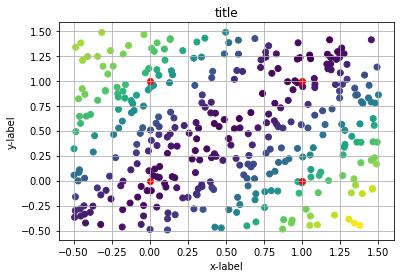

In [ ]:
data_size = 350
data = np.random.uniform(size=(data_size,2))*2  - 0.5
plt.scatter(data[:,0], data[:,1], c=model.predict(data))
plt.scatter(X[:,0], X[:,1], c = 'r')
plt.title("title")
plt.xlabel("x-label")
plt.ylabel("y-label")
plt.grid()
plt.show()

This way the whole model can discriminte the area that goes parallel to X=Y line. By having these two layers the model could learn a non connected set represented by green color. 

###Final predictions

In [ ]:
model.predict(X)

array([[6.40597823e-05],
       [9.99956090e-01],
       [9.99950317e-01],
       [1.87689325e-05]])

In [ ]:
#absolute error
y - model.predict(X)

array([[-6.40597823e-05],
       [ 4.39100199e-05],
       [ 4.96829626e-05],
       [-1.87689325e-05]])

The error is almost equal for all samples. We got around $10^{-5}$ absolute errors.